# Homework 6 problem 1b --
## Second virial coefficient

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import quad #numerical quadrature

Plotting as a function of $x=\frac{K_{B}T}{U_{0}}$, and normalising with respect to the hard-sphere result, we get the following simplified expression for $B_{2}$:

\begin{equation}
        B_{2}(x) = d \left[ \int_{0}^{R}dr r^{d-1}(1-0) + \int_{R}^{\infty}dr r^{d-1} \left( 1-e^{1/x} \right) \right]
\end{equation}

/home/svein/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/svein/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


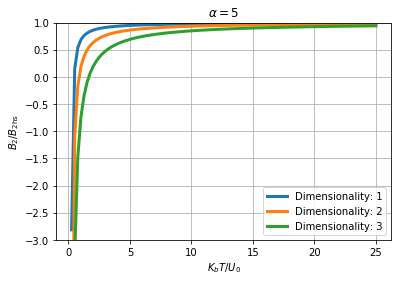

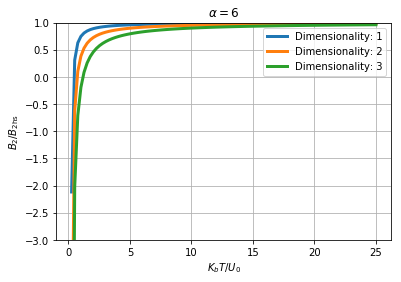

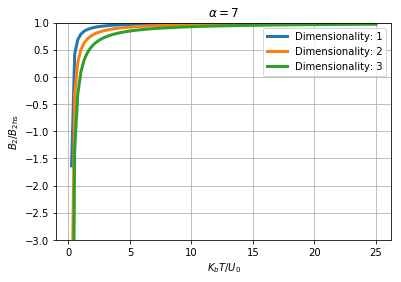

In [2]:
alphas = array([5,6,7])
dims = array([1, 2, 3])

#radially symmetric pair potential
def phi(r, alpha):
    if r > 1:
        return -(1/r)**alpha
    else:
        return inf

#second virial coefficient
def B2(x, d, alpha):
    beta = 1/x
    r1 = lambda r: r**(d-1)
    r2 = lambda r: r**(d-1)*(1-exp(-beta*phi(r, alpha)))
    return d *  ( quad(r1, 0, 1)[0] + quad(r2, 1, inf)[0] )

def plotalpha(alpha):
    for d in dims:
        xvals = linspace(0,25,100)
        yvals = array([B2(x,d,alpha) for x in xvals])
        title(r'$\alpha = %s$' % alpha)
        plot(xvals, yvals, label='Dimensionality: %s' %d, lw=3)
        xlabel(r'$K_{b}T/U_{0}$')
        ylabel(r'$B_{2}/B_{2 \mathrm{hs}}$')
        grid()
        ylim(-3, 1)
        legend()
    show()

for alpha in alphas:
    plotalpha(alpha)

    